In [1]:
import os

In [2]:
os.getcwd()

'/Users/ruchideshmukh/Desktop/mlprojects'

In [3]:
os.chdir('/Users/ruchideshmukh/Desktop/Coffee sales')

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
coffee=pd.read_csv('Project.csv')

In [20]:
#test
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16  Month             14

In [21]:
coffee.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


# Check for missing values

In [22]:
coffee.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
dtype: int64

# Check for duplicate values

In [23]:
coffee.duplicated().any()

False

# Store Profits

In [26]:
store_profit =  coffee.groupby('store_location')['Total_Bill'].sum()

In [27]:
store_profit

store_location
Astoria            232243.91
Hell's Kitchen     236511.17
Lower Manhattan    230057.25
Name: Total_Bill, dtype: float64

# Store Highest Sales

In [28]:
store_highest_sales = store_profit.idxmax()
highest_sales_amount = store_profit.max()
highest_sales_amount

236511.17

# Coffee Sales

In [30]:
coffee_sales = coffee.groupby(['store_location', 'product_type'])['Total_Bill'].sum()

In [31]:
coffee_sales

store_location   product_type         
Astoria          Barista Espresso         27935.00
                 Biscotti                  6676.50
                 Black tea                  760.75
                 Brewed Black tea         16141.00
                 Brewed Chai tea          27427.90
                                            ...   
Lower Manhattan  Premium Beans             3124.50
                 Premium brewed coffee    12907.00
                 Regular syrup             2614.40
                 Scone                    12660.67
                 Sugar free syrup          1152.80
Name: Total_Bill, Length: 87, dtype: float64

# Popular coffee

In [32]:
popular_coffee=coffee['product_type'].value_counts().idxmax()

In [33]:
popular_coffee

'Brewed Chai tea'

## Mean, Median 

In [35]:
coffee.Total_Bill.mean()

4.686367190643527

In [36]:
coffee.Total_Bill.median()

3.75

# Drop Columns

In [42]:

coffee = coffee.drop(columns=['Month Name','Day Name','Hour','Month','Day of Week'])

In [43]:
coffee.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large


<Axes: xlabel='product_detail'>

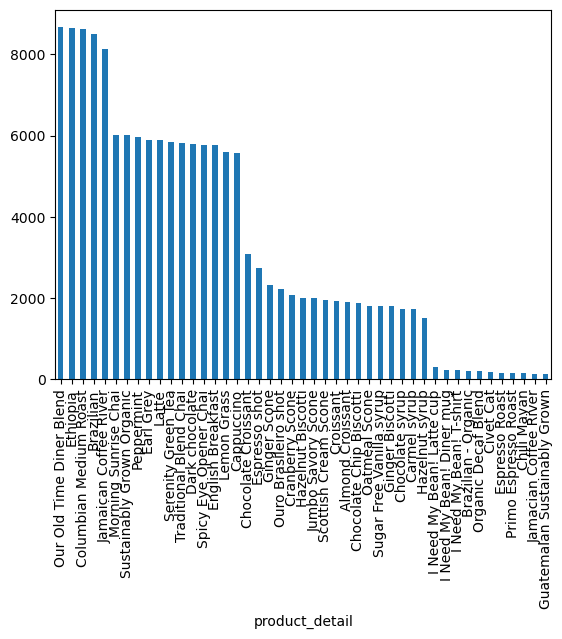

In [44]:
coffee['product_detail'].value_counts().plot(kind='bar')

<Axes: xlabel='product_type'>

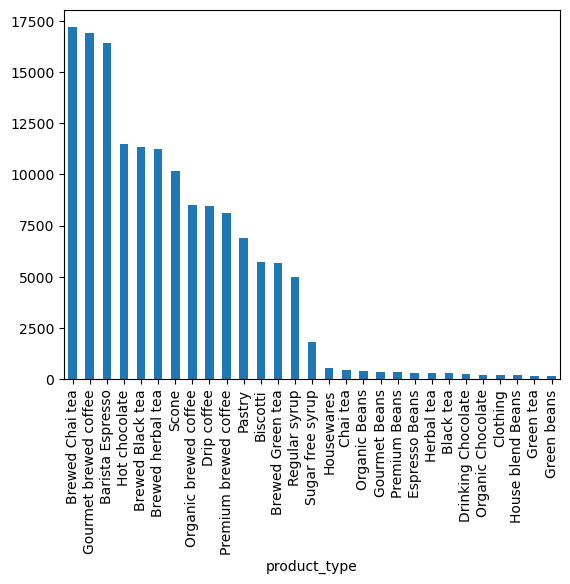

In [45]:
coffee['product_type'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

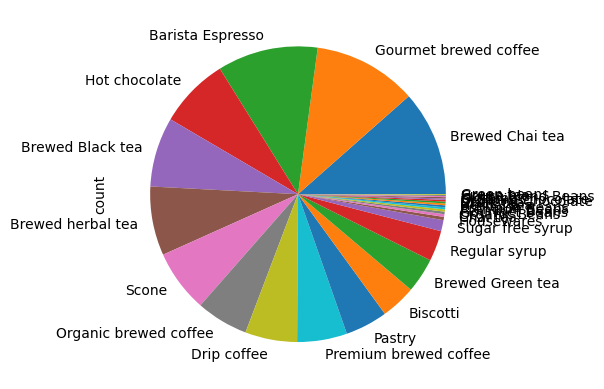

In [46]:
coffee['product_type'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

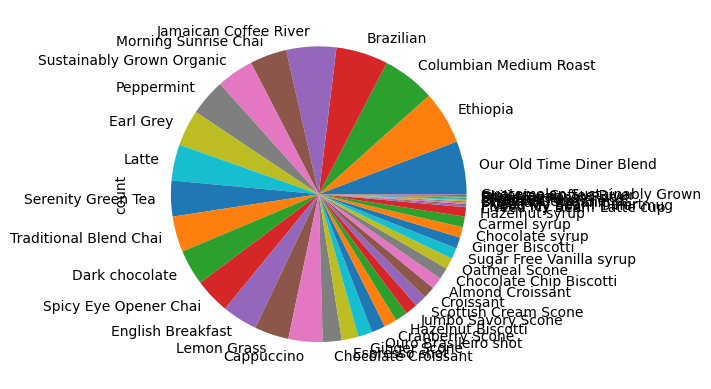

In [47]:
coffee['product_detail'].value_counts().plot(kind='pie')

In [48]:
coffee['product_id'].describe()

count    149116.000000
mean         47.918607
std          17.930020
min           1.000000
25%          33.000000
50%          47.000000
75%          60.000000
max          87.000000
Name: product_id, dtype: float64

In [49]:
data=coffee['store_id']

<Axes: xlabel='store_id', ylabel='Count'>

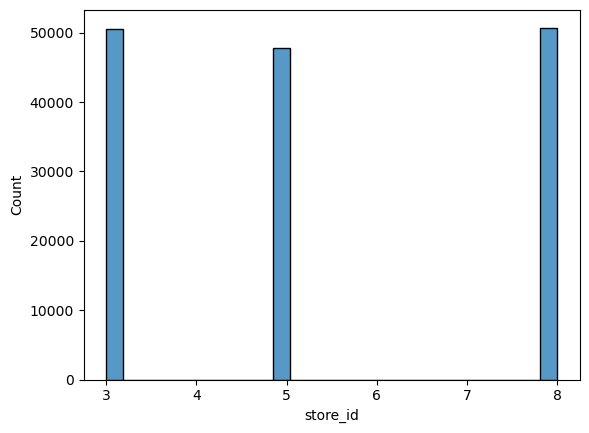

In [50]:
sns.histplot(data)


<Axes: xlabel='product_type', ylabel='Count'>

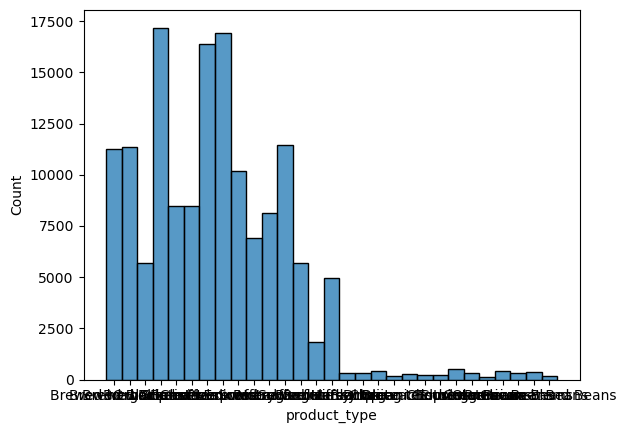

In [51]:
sns.histplot(coffee["product_type"])

<Axes: xlabel='product_id', ylabel='Count'>

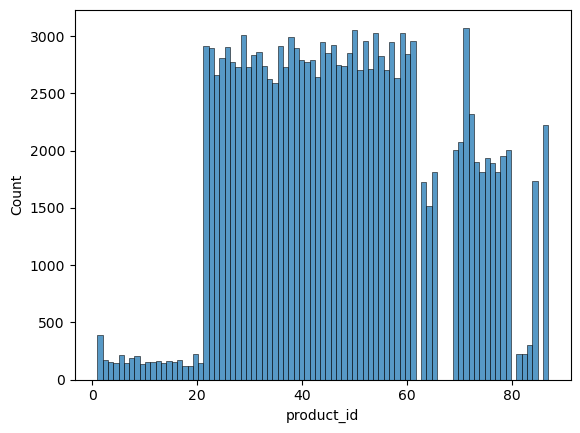

In [53]:
sns.histplot(coffee['product_id'])

# The most frequently sold product is 'Brewed Chai Tea'.Coffee is the most ordered product from store id 8